<a href="https://colab.research.google.com/github/np03cs4a240386-prog/Concepts-and-Technologies-of-AI/blob/main/Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


Problem 1

In [2]:
data = pd.read_csv("/content/drive/MyDrive/AI Workshop/diabetes_.csv")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


2.

In [6]:
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in invalid_cols:
    data[col] = data[col].replace(0, data[col].mean())

data.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


3.

In [7]:
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values


In [8]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_size_count = int(len(X) * test_size)
    test_indices = indices[:test_size_count]
    train_indices = indices[test_size_count:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)


In [9]:
print(X_train.shape, X_test.shape)


(538, 8) (230, 8)


4.


In [10]:
def euclidean_distance(point1, point2):
    if point1.shape != point2.shape:
        raise ValueError("Points must have same dimensions")
    return np.sqrt(np.sum((point1 - point2) ** 2))


5.

In [11]:
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_indices]
    return np.bincount(nearest_labels).argmax()


In [12]:
def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])


6.

In [13]:
def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100


In [14]:
predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)
accuracy


np.float64(70.43478260869566)

Problem 2


1.


In [15]:
def standardize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

X_scaled = standardize(X)


In [16]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split_scratch(X_scaled, y)


In [17]:
scaled_preds = knn_predict(Xs_test, Xs_train, ys_train, k=3)
scaled_accuracy = compute_accuracy(ys_test, scaled_preds)

accuracy, scaled_accuracy


(np.float64(70.43478260869566), np.float64(71.30434782608695))

Problem 3


In [19]:
k_values = range(1, 16)

acc_original = []
acc_scaled = []
time_original = []
time_scaled = []

for k in k_values:
    start = time.time()
    pred = knn_predict(X_test, X_train, y_train, k)
    time_original.append(time.time() - start)
    acc_original.append(compute_accuracy(y_test, pred))

    start = time.time()
    pred_s = knn_predict(Xs_test, Xs_train, ys_train, k)
    time_scaled.append(time.time() - start)
    acc_scaled.append(compute_accuracy(ys_test, pred_s))


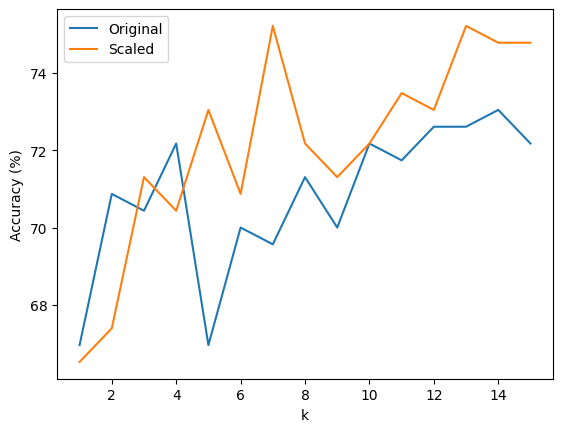

In [20]:
plt.figure()
plt.plot(k_values, acc_original, label="Original")
plt.plot(k_values, acc_scaled, label="Scaled")
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()


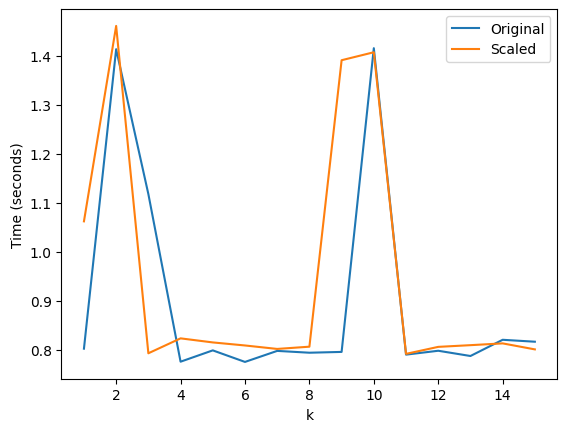

In [21]:
plt.figure()
plt.plot(k_values, time_original, label="Original")
plt.plot(k_values, time_scaled, label="Scaled")
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()
